## Task 9: Data Preprocessing & Feature Engineering
### ------------------------------------------------
### This notebook covers 4 preprocessing tasks using real-world datasets:
### 1. Handling Missing Data (Titanic)
### 2. Encoding Categorical Variables (Car Evaluation)
### 3. Feature Scaling (Wine Quality)
### 4. Handling Outliers (Boston Housing)
### ------------------------------------------------

## Task 1: Handling Missing Data (Titanic Dataset)

In [7]:
import pandas as pd
import numpy as np

# Load datasets
# Update the path as needed if the files are not in the current directory
train = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\titanic\train.csv")
test = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\titanic\test.csv")

print("Shape of train:", train.shape)
print("Shape of test:", test.shape)

Shape of train: (891, 12)
Shape of test: (418, 11)


In [8]:
# -------------------------------
# 1. Check missing values
# -------------------------------
print("\nMissing values in Train:")
print(train.isnull().sum())

print("\nMissing values in Test:")
print(test.isnull().sum())


Missing values in Train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in Test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# -------------------------------
# 2. Handle missing values in Train
# -------------------------------

# Age → has many missing values, fill with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Cabin → too many missing values, drop it
train.drop(columns=['Cabin'], inplace=True)

# Embarked → only 2 missing, fill with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
# or you can drop the 2 also

C:\Users\Hp\AppData\Local\Temp\ipykernel_12144\1896241622.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_12144\1896241622.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [10]:
# -------------------------------
# 3. Handle missing values in Test
# -------------------------------

# Age → fill with median
test['Age'].fillna(test['Age'].median(), inplace=True)

# Fare → 1 missing, fill with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Cabin → drop
test.drop(columns=['Cabin'], inplace=True)

# Embarked → fill with mode (if missing)
if test['Embarked'].isnull().sum() > 0:
    test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12144\3785826546.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_12144\3785826546.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [11]:
# -------------------------------
# 4. Confirm no missing values left
# -------------------------------
print("\nAfter Cleaning:")
print("Train missing values:\n", train.isnull().sum())
print("Test missing values:\n", test.isnull().sum())


After Cleaning:
Train missing values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Test missing values:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Task#2: Encoding Categorical Variables(Car Evaluation Dataset)

In [ ]:
# Define column names from car.names file
cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Load dataset
car_df = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\car evaluation\car.data", names=cols)

print("Shape of dataset:", car_df.shape)
print("\nFirst 5 rows:")
print(car_df.head())

Shape of dataset: (1728, 7)

First 5 rows:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [16]:
# -------------------------------
# 1. Label Encoding (ordinal style)
# -------------------------------
from sklearn.preprocessing import LabelEncoder

label_encoded = car_df.copy()
le = LabelEncoder()

for col in label_encoded.columns:
    label_encoded[col] = le.fit_transform(label_encoded[col])

print("\nLabel Encoded Dataset (first 5 rows):")
print(label_encoded.head())


Label Encoded Dataset (first 5 rows):
   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       1      2
1       3      3      0        0         2       2      2
2       3      3      0        0         2       0      2
3       3      3      0        0         1       1      2
4       3      3      0        0         1       2      2


In [17]:
# -------------------------------
# 2. One-Hot Encoding (binary columns)
# -------------------------------
onehot_encoded = pd.get_dummies(car_df, drop_first=False)  # keep all categories

print("\nOne-Hot Encoded Dataset (first 5 columns):")
print(onehot_encoded.iloc[:, :5].head())


One-Hot Encoded Dataset (first 5 columns):
   buying_high  buying_low  buying_med  buying_vhigh  maint_high
0        False       False       False          True       False
1        False       False       False          True       False
2        False       False       False          True       False
3        False       False       False          True       False
4        False       False       False          True       False


## Task#3:Feature Scaling (Wine Quality Dataset)

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# -------------------------------
# 1. Load both datasets
# -------------------------------
red_wine = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\wine quality\winequality-red.csv", sep=";")
white_wine = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\wine quality\winequality-white.csv", sep=";")

print("Red wine shape:", red_wine.shape)
print("White wine shape:", white_wine.shape)

print("\nRed wine columns:", list(red_wine.columns))
print("\nWhite wine columns:", list(white_wine.columns))

Red wine shape: (1599, 12)
White wine shape: (4898, 12)

Red wine columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

White wine columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [21]:
# -------------------------------
# 2. Combine datasets with type column
# -------------------------------
red_wine["type"] = "red"
white_wine["type"] = "white"

wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

print("\nCombined dataset shape:", wine_df.shape)


Combined dataset shape: (6497, 13)


In [22]:
# -------------------------------
# 3. Separate features and target
# -------------------------------
X = wine_df.drop(columns=["quality", "type"])  # features
y = wine_df["quality"]  # target

In [23]:
# -------------------------------
# 4. Apply Scaling
# -------------------------------

## Standardization (Z-score scaling)
scaler_standard = StandardScaler()
X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)

## Normalization (Min-Max scaling)
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)

print("\nStandardized Data (first 5 rows):")
print(X_standard.head())

print("\nMin-Max Scaled Data (first 5 rows):")
print(X_minmax.head())


Standardized Data (first 5 rows):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  
0 -0.91

## Task 4: Handling Outliers (Boston Housing Dataset)

In [26]:
# Step 1: Load data and set up columns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\boston-housing\train.csv")
test  = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\boston-housing\test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train columns:", list(train.columns))
print("Test  columns:", list(test.columns))

# infer target col name (MEDV) if present in train
target_col = "medv"

train = train.drop(columns=["ID"])

# Get numeric feature columns (everything except target in train)
feature_cols = [col for col in train.select_dtypes(include=np.number).columns if col != target_col]

print("\nTarget column:", target_col)
print("Feature columns (numeric):", feature_cols)


Train shape: (333, 15)
Test shape: (173, 14)
Train columns: ['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
Test  columns: ['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

Target column: medv
Feature columns (numeric): ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


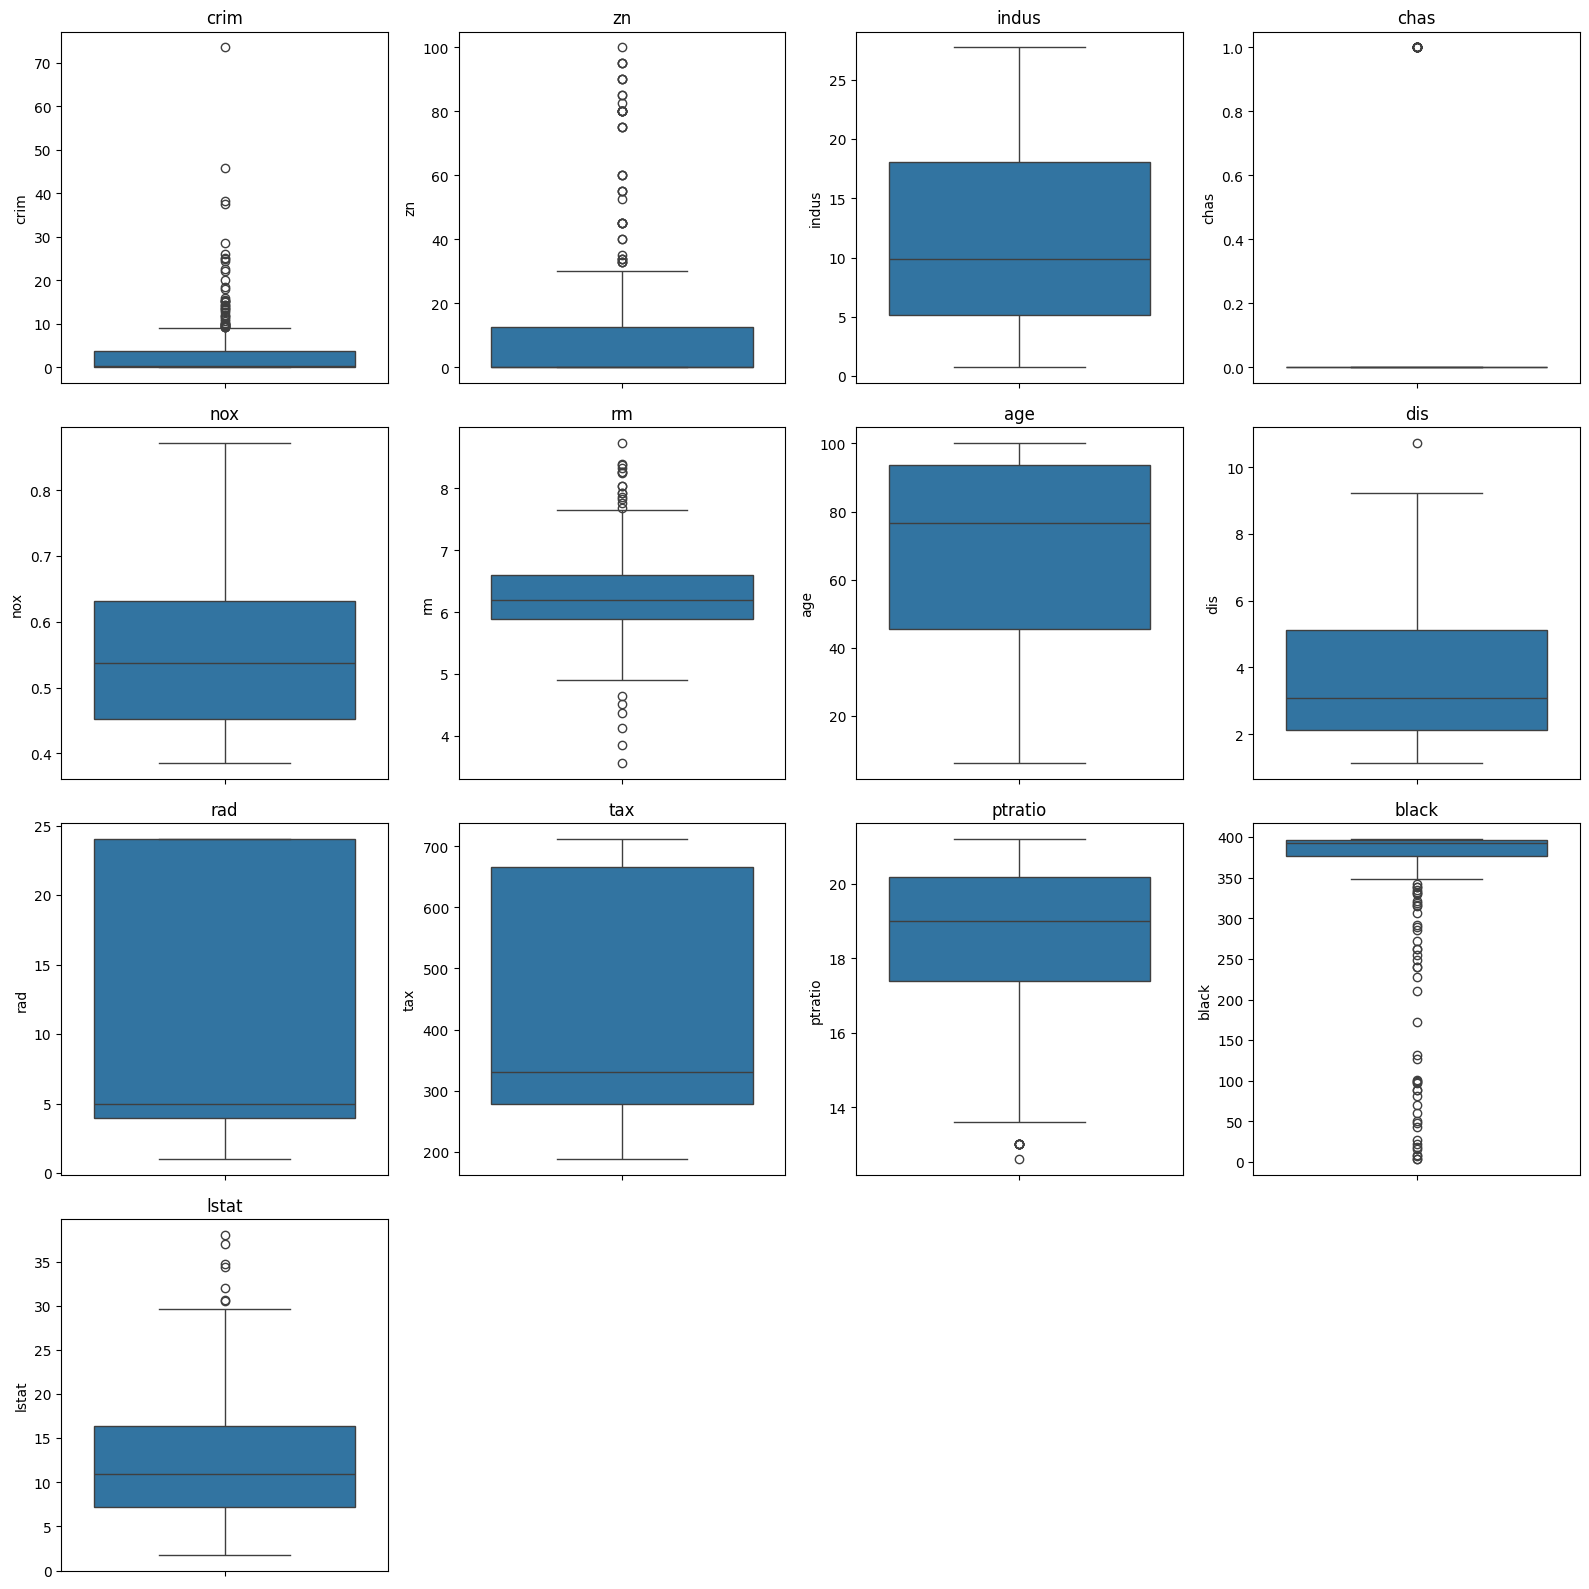

In [27]:
# Step 2: Visual detection (boxplots on train features)
n = len(feature_cols)
rows = int(np.ceil(n / 4))
plt.figure(figsize=(16, 4*rows))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(y=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [28]:
# Step 3: Z-score detection on train features ONLY
from scipy.stats import zscore

z_df = train[feature_cols].apply(zscore)
z_outlier_mask = z_df.abs() > 3
z_outlier_counts = z_outlier_mask.sum().sort_values(ascending=False)

print("Z-score outliers per column (|z| > 3):")
print(z_outlier_counts)

Z-score outliers per column (|z| > 3):
chas       20
black      18
zn         17
rm          6
crim        6
lstat       4
dis         1
nox         0
indus       0
rad         0
age         0
ptratio     0
tax         0
dtype: int64


In [29]:
# Step 4: IQR detection on train features ONLY
Q1 = train[feature_cols].quantile(0.25)
Q3 = train[feature_cols].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_outlier_mask_train = (train[feature_cols] < lower) | (train[feature_cols] > upper)
iqr_outlier_counts = iqr_outlier_mask_train.sum().sort_values(ascending=False)

print("IQR outliers per column (1.5×IQR):")
print(iqr_outlier_counts)

# Save thresholds for transparency/repro
thresholds = pd.DataFrame({"lower": lower, "upper": upper})
thresholds.to_csv("boston_iqr_thresholds_train.csv")
print("\nSaved thresholds to boston_iqr_thresholds_train.csv")

IQR outliers per column (1.5×IQR):
black      47
crim       42
zn         41
rm         21
chas       20
ptratio     9
lstat       7
dis         1
indus       0
nox         0
age         0
rad         0
tax         0
dtype: int64

Saved thresholds to boston_iqr_thresholds_train.csv


In [30]:
# Step 5: Apply IQR capping (train + test) using train thresholds
train_capped = train.copy()
test_capped  = test.copy()

# clip supports Series thresholds when axis=1
train_capped[feature_cols] = train_capped[feature_cols].clip(lower=lower, upper=upper, axis=1)

# some test files may be missing some features; align thresholds
existing_test_feats = [c for c in feature_cols if c in test_capped.columns]
test_capped[existing_test_feats] = test_capped[existing_test_feats].clip(
    lower=lower[existing_test_feats], 
    upper=upper[existing_test_feats], 
    axis=1
)

# How many values got capped (train/test)?
train_capped_counts = (train_capped[feature_cols] != train[feature_cols]).sum().sort_values(ascending=False)
test_capped_counts = (test_capped[existing_test_feats] != test[existing_test_feats]).sum().sort_values(ascending=False)

print("CAPPED values per column (TRAIN):")
print(train_capped_counts[train_capped_counts > 0])

print("\nCAPPED values per column (TEST):")
print(test_capped_counts[test_capped_counts > 0])

CAPPED values per column (TRAIN):
black      47
crim       42
zn         41
rm         21
chas       20
ptratio     9
lstat       7
dis         1
dtype: int64

CAPPED values per column (TEST):
black      31
zn         27
crim       24
chas       15
rm         11
ptratio     6
lstat       5
dis         4
dtype: int64


## Task#5: Advanced Data Imputation (Retail Sales Dataset)

In [32]:
import pandas as pd

df = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\Reatil Sales\retail_sales_dataset.csv") 
print("Dataset shape:", df.shape)
print("\nColumns and first few rows:")
print(df.head())
print("\nMissing value counts:")
print(df.isnull().sum())

Dataset shape: (1000, 9)

Columns and first few rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Missing value counts:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int

### we’ve got 0 missing values in all columns.
### But since Task 5 is about handling missing values using advanced techniques (KNN & MICE), we’ll still demonstrate it

In [33]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select only numeric columns for imputation
numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]

df_numeric = df[numeric_cols]

# -----------------------------
# KNN Imputation
# -----------------------------
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numeric),
                              columns=numeric_cols)

# -----------------------------
# MICE (Iterative Imputer)
# -----------------------------
mice_imputer = IterativeImputer(random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_numeric),
                               columns=numeric_cols)

# Replace original numeric cols with KNN/MICE results (for comparison)
df_knn = df.copy()
df_knn[numeric_cols] = df_knn_imputed

df_mice = df.copy()
df_mice[numeric_cols] = df_mice_imputed

# Show before & after (just first few rows)
print("\nOriginal Dataset (first 5 rows):")
print(df[numeric_cols].head())

print("\nAfter KNN Imputation (first 5 rows):")
print(df_knn[numeric_cols].head())

print("\nAfter MICE Imputation (first 5 rows):")
print(df_mice[numeric_cols].head())


Original Dataset (first 5 rows):
   Age  Quantity  Price per Unit  Total Amount
0   34         3              50           150
1   26         2             500          1000
2   50         1              30            30
3   37         1             500           500
4   30         2              50           100

After KNN Imputation (first 5 rows):
    Age  Quantity  Price per Unit  Total Amount
0  34.0       3.0            50.0         150.0
1  26.0       2.0           500.0        1000.0
2  50.0       1.0            30.0          30.0
3  37.0       1.0           500.0         500.0
4  30.0       2.0            50.0         100.0

After MICE Imputation (first 5 rows):
    Age  Quantity  Price per Unit  Total Amount
0  34.0       3.0            50.0         150.0
1  26.0       2.0           500.0        1000.0
2  50.0       1.0            30.0          30.0
3  37.0       1.0           500.0         500.0
4  30.0       2.0            50.0         100.0


## Task#6: Feature Engineering (Heart Disease Dataset)

In [ ]:
import pandas as pd
import numpy as np

# Column names from UCI documentation
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

# Load all datasets
files = [
    r"D:\BuildablesDataScienceFellowship\Task#9\heart disease\processed.cleveland.data",
    r"D:\BuildablesDataScienceFellowship\Task#9\heart disease\processed.hungarian.data",
    r"D:\BuildablesDataScienceFellowship\Task#9\heart disease\processed.switzerland.data",
    r"D:\BuildablesDataScienceFellowship\Task#9\heart disease\processed.va.data"
]

dfs = []
for f in files:
    df = pd.read_csv(f, names=columns, na_values="?")
    df["dataset"] = f.split(".")[1]   # keep track of dataset origin
    dfs.append(df)

# Combine into one big dataframe
df_all = pd.concat(dfs, ignore_index=True)

# Drop rows with missing values for simplicity (you could impute instead)
df_all = df_all.dropna()

# ---- Feature Engineering ----

# Age Groups
df_all["age_group"] = pd.cut(df_all["age"], 
                             bins=[0, 35, 50, 65, 120], 
                             labels=["Young", "Middle-aged", "Senior", "Elderly"])

# Cholesterol Categories
df_all["chol_category"] = pd.cut(df_all["chol"], 
                                 bins=[0, 200, 239, 600], 
                                 labels=["Desirable", "Borderline High", "High"])

# Risk Factor Score
def risk_score(row):
    score = 0
    if row["trestbps"] > 140: score += 1
    if row["chol"] > 240: score += 1
    if row["fbs"] == 1: score += 1
    return score

df_all["risk_score"] = df_all.apply(risk_score, axis=1)

# Preview
print(df_all.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target    dataset    age_group    chol_category  \
0    3.0  0.0   6.0       0  cleveland       Senior  Borderline High   
1    2.0  3.0   3.0       2  cleveland      Elderly             High   
2    2.0  2.0   7.0       1  cleveland      Elderly  Borderline High   
3    3.0  0.0   3.0       0  cleveland  Middle-aged             High   
4    1.0  0.0   3.0       0  cleveland  Middle-aged  Borderline High   

   risk_score  
0           2  
1           2  
2           0  
3           1  
4           0  
 Feature

## Task#7: Variable Transformation (Bike Sharing Dataset)


Skewness for D:\BuildablesDataScienceFellowship\Task#9\bike sharing dataset\day.csv:
instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

Highly skewed features in D:\BuildablesDataScienceFellowship\Task#9\bike sharing dataset\day.csv:
 Index(['holiday', 'workingday', 'weathersit', 'casual'], dtype='object')
Transformed dataset saved as 'day_transformed.csv'


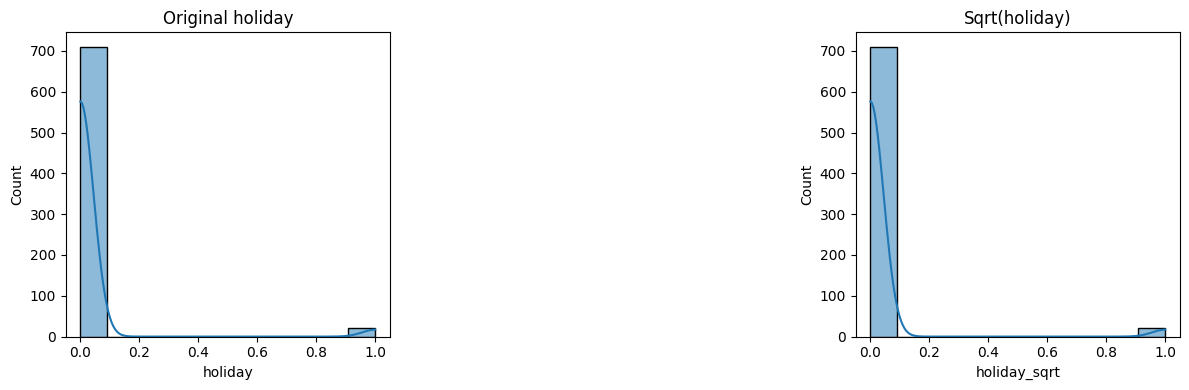

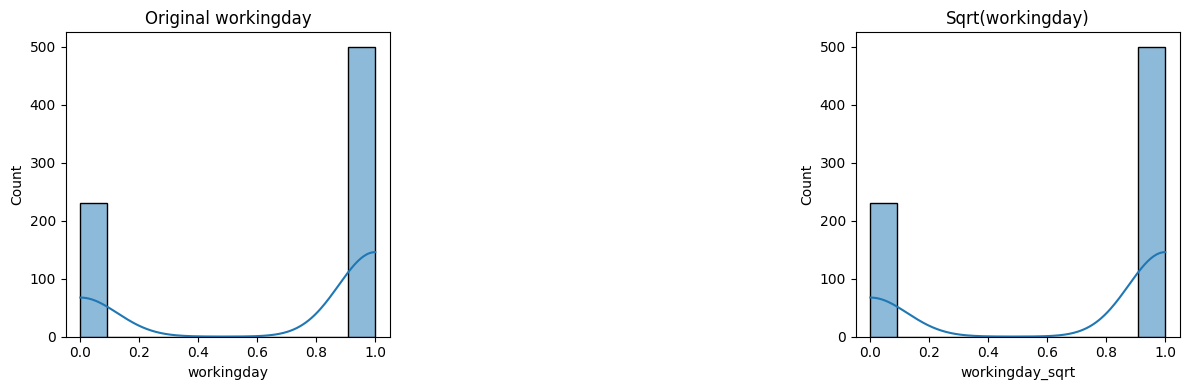

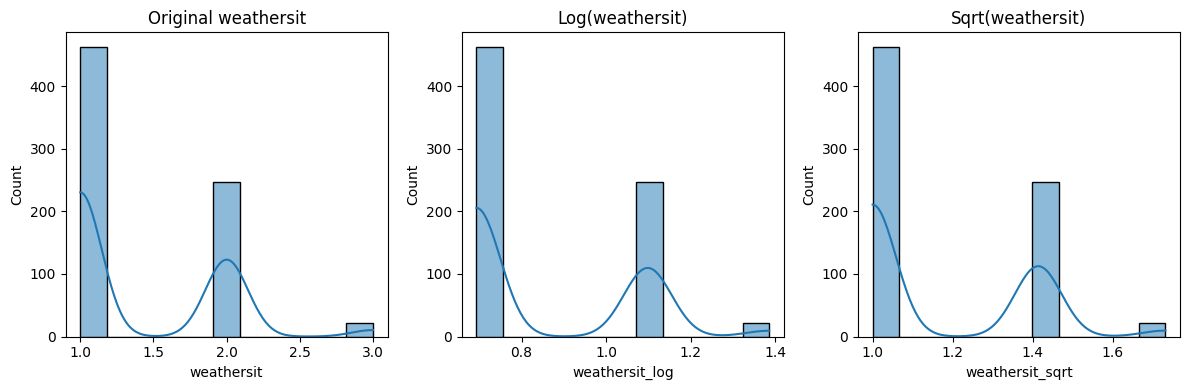

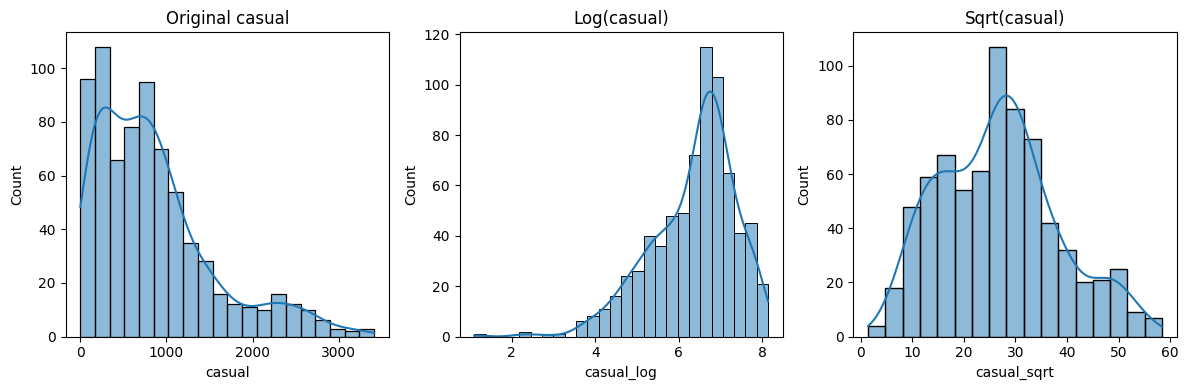


Skewness for D:\BuildablesDataScienceFellowship\Task#9\bike sharing dataset\hour.csv:
instant       0.000000
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

Highly skewed features in D:\BuildablesDataScienceFellowship\Task#9\bike sharing dataset\hour.csv:
 Index(['holiday', 'workingday', 'weathersit', 'casual', 'registered', 'cnt'], dtype='object')
Transformed dataset saved as 'hour_transformed.csv'


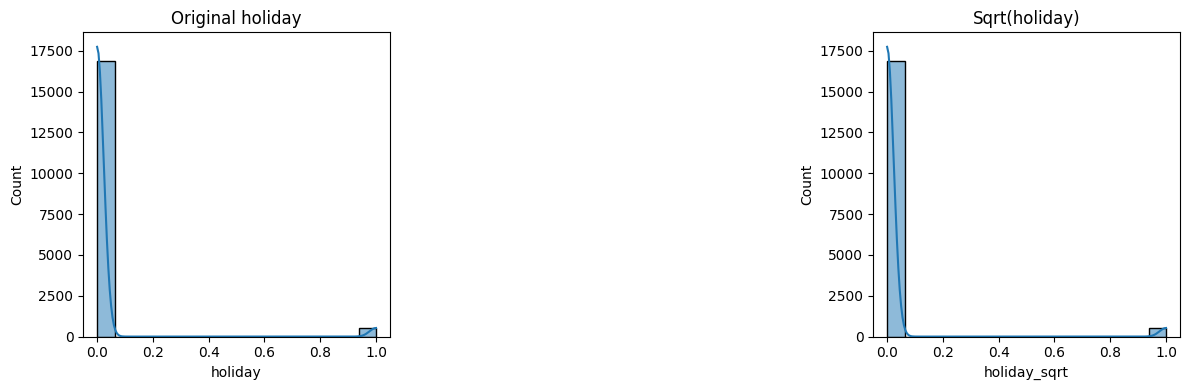

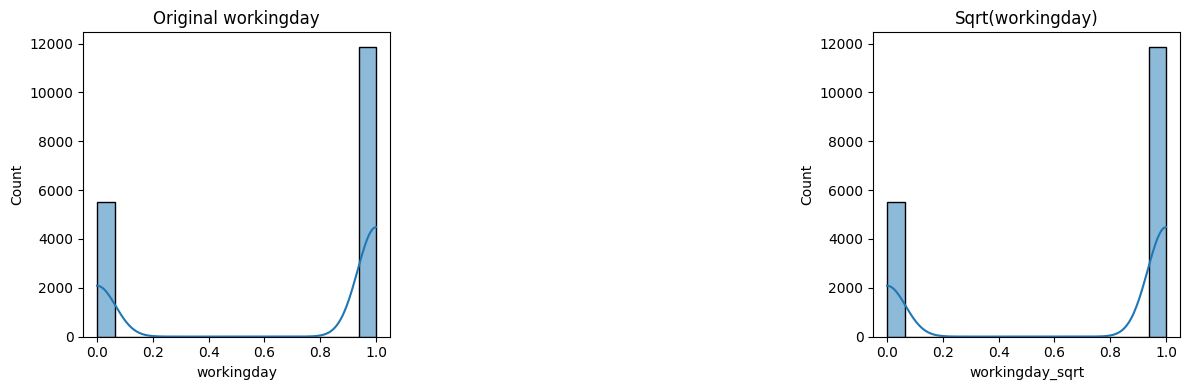

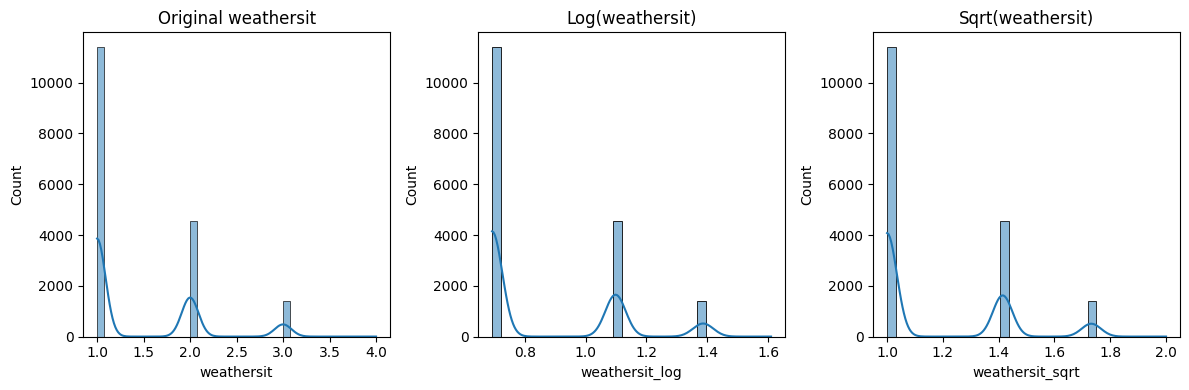

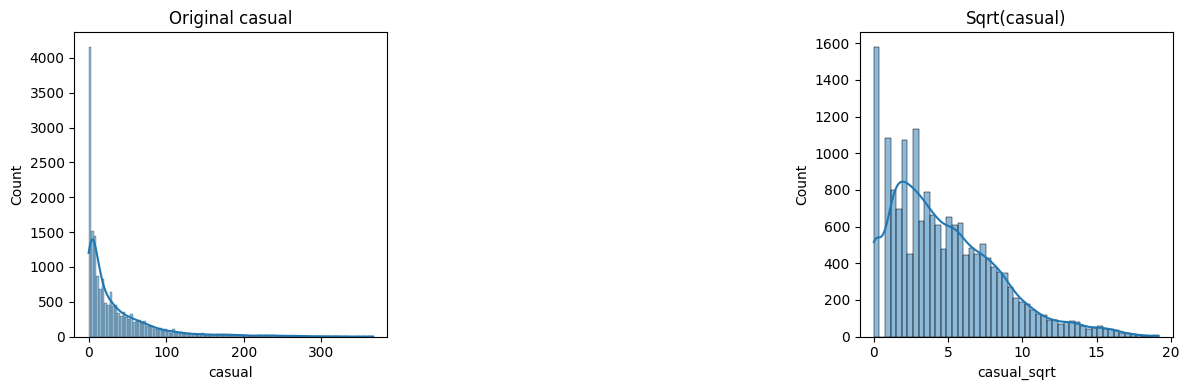

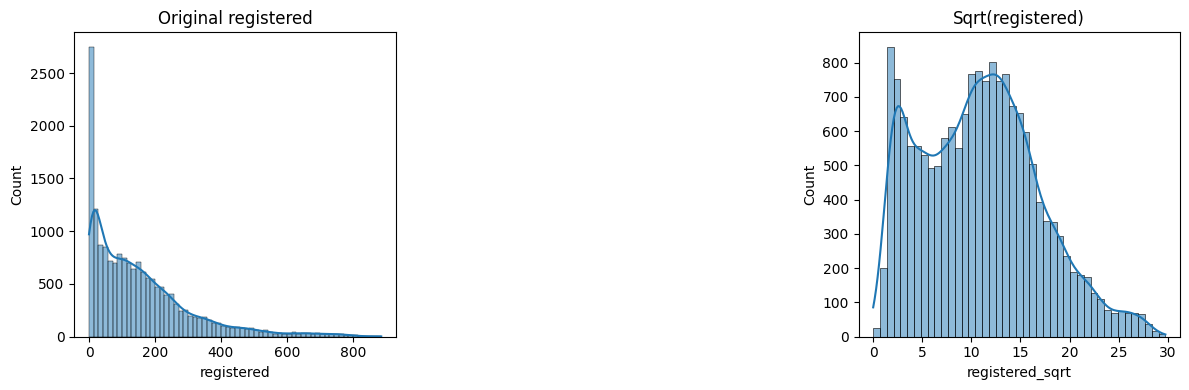

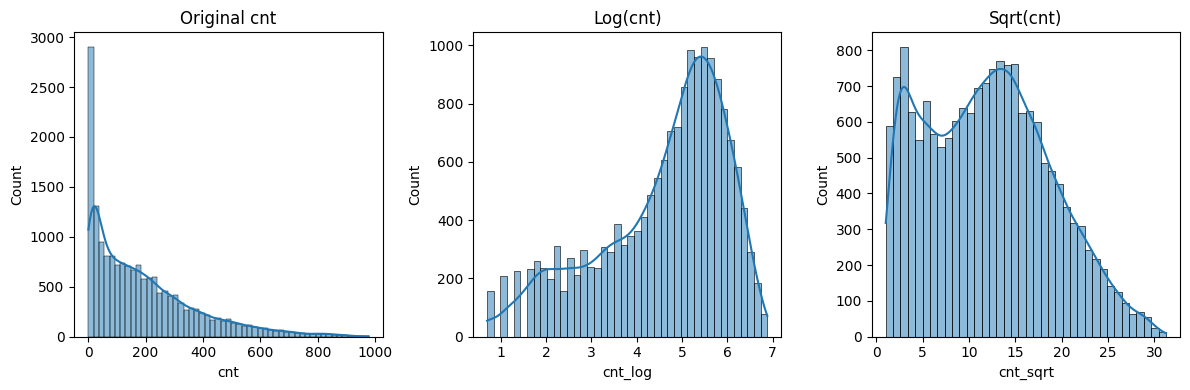

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def transform_dataset(file_name, save_as):
    # Load dataset
    df = pd.read_csv(file_name)
    print(f"\nSkewness for {file_name}:")
    skew_vals = df.skew(numeric_only=True)
    print(skew_vals)

    # Identify skewed features
    skewed_feats = skew_vals[abs(skew_vals) > 0.7].index
    print(f"\nHighly skewed features in {file_name}:\n", skewed_feats)

    # Copy dataset for transformations
    df_transformed = df.copy()

    # Apply transformations to each skewed feature
    for feat in skewed_feats:
        if (df[feat] <= 0).any():  
            # log needs strictly positive values
            df_transformed[feat + "_sqrt"] = np.sqrt(df[feat].clip(lower=0))
        else:
            df_transformed[feat + "_log"] = np.log1p(df[feat])  # log(1+x)
            df_transformed[feat + "_sqrt"] = np.sqrt(df[feat])
            df_transformed[feat + "_boxcox"], _ = stats.boxcox(df[feat])

    # Save transformed dataset
    df_transformed.to_csv(save_as, index=False)
    print(f"Transformed dataset saved as '{save_as}'")

    # Plot histograms of transformed features
    for feat in skewed_feats:
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        sns.histplot(df[feat], kde=True)
        plt.title(f"Original {feat}")

        if feat + "_log" in df_transformed:
            plt.subplot(1, 3, 2)
            sns.histplot(df_transformed[feat + "_log"], kde=True)
            plt.title(f"Log({feat})")

        if feat + "_sqrt" in df_transformed:
            plt.subplot(1, 3, 3)
            sns.histplot(df_transformed[feat + "_sqrt"], kde=True)
            plt.title(f"Sqrt({feat})")

        plt.tight_layout()
        plt.show()


# Apply to both datasets
transform_dataset(r"D:\BuildablesDataScienceFellowship\Task#9\bike sharing dataset\day.csv", "day_transformed.csv")
transform_dataset(r"D:\BuildablesDataScienceFellowship\Task#9\bike sharing dataset\hour.csv", "hour_transformed.csv")


## Task#8: Feature Selection (Diabetes Dataset)

In [43]:

import pandas as pd
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"D:\BuildablesDataScienceFellowship\Task#9\Diabetes\diabetes.csv"
df = pd.read_csv(file_path)

print(" Dataset Loaded. Shape:", df.shape)

# -----------------------------
# 1. Correlation Analysis
# -----------------------------
corr = df.corr()["Outcome"].sort_values(ascending=False)
print("\n Correlation with Outcome:\n", corr)

# -----------------------------
# 2. Mutual Information
# -----------------------------
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

mi = mutual_info_classif(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("\n Mutual Information Scores:\n", mi_series)

# -----------------------------
# 3. Recursive Feature Elimination (RFE)
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(max_iter=2000, solver="liblinear")

rfe = RFE(estimator=log_reg, n_features_to_select=5)  # top 5 features
rfe.fit(X_scaled, y)

rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("\n RFE Feature Rankings (1 = selected):\n", rfe_ranking)


 Dataset Loaded. Shape: (768, 9)

 Correlation with Outcome:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

 Mutual Information Scores:
 Glucose                     0.114634
BMI                         0.080061
Pregnancies                 0.060985
Age                         0.051395
DiabetesPedigreeFunction    0.014590
Insulin                     0.011948
SkinThickness               0.004667
BloodPressure               0.000000
dtype: float64

 RFE Feature Rankings (1 = selected):
 Pregnancies                 1
Glucose                     1
BloodPressure               1
BMI                         1
DiabetesPedigreeFunction    1
Age                         2
Insulin       

In [5]:
%pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sys, subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])

0

## Task 9: Handling Imbalanced Data (Credit Card Fraud Detection)

In [12]:
# Task 9: Handling Imbalanced Data – Credit Card Fraud Detection

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Load dataset
file_path = r"D:\BuildablesDataScienceFellowship\Task#9\credit card fraud\creditcard.csv"
df = pd.read_csv(file_path)

print(" Dataset Loaded. Shape:", df.shape)

# Features & target
X = df.drop("Class", axis=1)
y = df["Class"]

print("\n Original Class Distribution:", Counter(y))

# -----------------------------
# 1. Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\n Training Class Distribution:", Counter(y_train))

# -----------------------------
# 2. SMOTE Oversampling
# -----------------------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("\n After SMOTE:", Counter(y_smote))

# -----------------------------
# 3. ADASYN Oversampling
# -----------------------------
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)
print("\n After ADASYN:", Counter(y_adasyn))

# -----------------------------
# 4. Random Undersampling
# -----------------------------
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_train, y_train)
print("\n After Undersampling:", Counter(y_under))


 Dataset Loaded. Shape: (284807, 31)

 Original Class Distribution: Counter({0: 284315, 1: 492})

 Training Class Distribution: Counter({0: 227451, 1: 394})

 After SMOTE: Counter({0: 227451, 1: 227451})

 After ADASYN: Counter({0: 227451, 1: 227346})

 After Undersampling: Counter({0: 394, 1: 394})


## Task#10: Combining Multiple Datasets (MovieLens Dataset)

In [13]:
# Task 10: Merge & Preprocess MovieLens Dataset
import pandas as pd

# Load datasets
ratings = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\movielens\ratings.csv")
movies = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\movielens\movies.csv")
links = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\movielens\links.csv")
tags = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\movielens\tags.csv")

# Merge ratings with movies
ratings_movies = ratings.merge(movies, on="movieId", how="left")

# Merge with tags
ratings_movies_tags = ratings_movies.merge(tags, on=["userId", "movieId"], how="left")

# Merge with links
final_data = ratings_movies_tags.merge(links, on="movieId", how="left")

# Basic preprocessing
final_data.drop_duplicates(inplace=True)   # remove duplicate rows
final_data.dropna(inplace=True)            # remove rows with missing values

print("Final dataset shape:", final_data.shape)
print(final_data.head())


Final dataset shape: (3476, 10)
     userId  movieId  rating  timestamp_x                 title  genres  \
241       2    60756     5.0   1445714980  Step Brothers (2008)  Comedy   
242       2    60756     5.0   1445714980  Step Brothers (2008)  Comedy   
243       2    60756     5.0   1445714980  Step Brothers (2008)  Comedy   
252       2    89774     5.0   1445715189        Warrior (2011)   Drama   
253       2    89774     5.0   1445715189        Warrior (2011)   Drama   

                 tag   timestamp_y   imdbId   tmdbId  
241            funny  1.445715e+09   838283  12133.0  
242  Highly quotable  1.445715e+09   838283  12133.0  
243     will ferrell  1.445715e+09   838283  12133.0  
252     Boxing story  1.445715e+09  1291584  59440.0  
253              MMA  1.445715e+09  1291584  59440.0  


## Task#11: Dimensionality Reduction (MNIST Dataset)

Original shape: (60000, 784)
After PCA: (60000, 50)


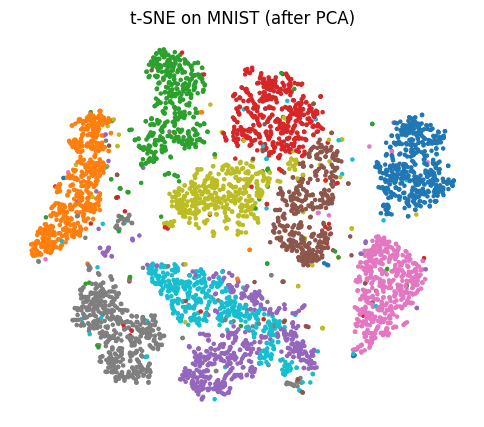

In [14]:
# Task 11: Dimensionality Reduction – MNIST (Kaggle CSV)
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load training data
df = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\MNIST\mnist_train.csv")

# Separate features and labels
X = df.drop("label", axis=1).values
y = df["label"].values

print("Original shape:", X.shape)

# PCA reduction to 50 components
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)
print("After PCA:", X_pca.shape)

# t-SNE on a subset (for speed)
subset = X_pca[:5000]
subset_y = y[:5000]
tsne = TSNE(n_components=2, random_state=42, init="pca")
X_tsne = tsne.fit_transform(subset)

# Plot
plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=subset_y, cmap="tab10", s=5)
plt.title("t-SNE on MNIST (after PCA)")
plt.axis('off')
plt.show()


## Text Preprocessing (IMDB Movie Reviews Dataset)

In [15]:
# Task 12: Text Preprocessing – IMDB Reviews
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Make sure NLTK resources are available
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Load dataset
df = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\IMBD\IMDB Dataset.csv")
print("Dataset shape:", df.shape)
print(df.head(2))

# Initialize tools
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()
    # 2. Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # 3. Tokenization
    tokens = word_tokenize(text)
    # 4. Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    # 5a. Stemming
    stemmed = [stemmer.stem(w) for w in tokens]
    # 5b. Lemmatization
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens]
    return {"tokens": tokens, "stemmed": stemmed, "lemmatized": lemmatized}

# Apply preprocessing on a small sample
sample = df["review"].iloc[0]
print("\nOriginal:\n", sample)
processed = preprocess_text(sample)
print("\nAfter preprocessing:\n", processed)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

Original:
 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..

## Task 13: Time-Series Preprocessing (Air Quality Dataset)

C:\Users\Hp\AppData\Local\Temp\ipykernel_16520\954554197.py:31: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='time')


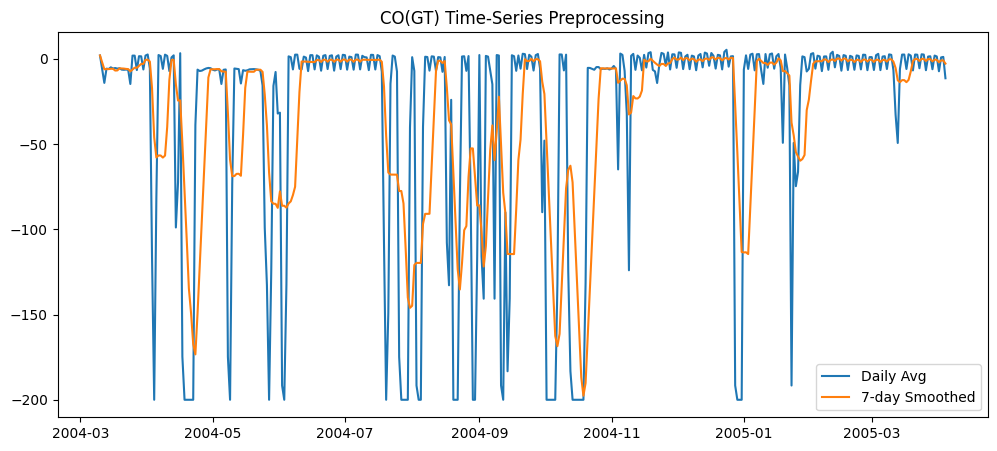

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"D:\BuildablesDataScienceFellowship\Task#9\air quality\AirQualityUCI.csv", 
                 sep=";", decimal=",")

# Drop unnamed empty columns if they exist
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Combine Date + Time into one datetime column
df['datetime'] = pd.to_datetime(
    df['Date'] + " " + df['Time'], 
    format="%d/%m/%Y %H.%M.%S", 
    errors="coerce"
)

# Drop rows where datetime could not be parsed
df = df.dropna(subset=['datetime'])

# Set datetime index
df = df.set_index('datetime')

# Ensure index is sorted
df = df.sort_index()

# Handle missing timestamps (fill missing hours)
df = df.asfreq('h')

# Fill missing values by interpolation
df = df.interpolate(method='time')

# Resample to daily average
df_daily = df.select_dtypes(include='number').resample('D').mean()

# Apply smoothing (7-day rolling mean)
df_smoothed = df_daily.rolling(window=7, min_periods=1).mean()

# Plot example: CO(GT)
plt.figure(figsize=(12,5))
plt.plot(df_daily['CO(GT)'], label='Daily Avg')
plt.plot(df_smoothed['CO(GT)'], label='7-day Smoothed')
plt.legend()
plt.title("CO(GT) Time-Series Preprocessing")
plt.show()